In [1]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import numpy as np
import matplotlib.dates as md

db_filename = 'dinofunworld-3.db'
conn = sqlite3.connect(db_filename)
c = conn.cursor()

In [2]:
def replace_not_atmosfear(row, atmosfear_ID):
    row_split = row.split("-")
    for i in range(len(row_split)):
        if row_split[i] != str(atmosfear_ID):
            row_split[i] = '0'
    return np.array(row_split, dtype=np.int32)

In [3]:
# Using the data provided, create a control chart displaying the attendance, the mean, and the standard deviation bands at one and two standard deviations.

# SQL query is faster than pandas dataframe. Hence, use sql to query Atmosfear's sequences.
sql_query = """SELECT attractionId, Name FROM attraction where attraction.Name = 'Atmosfear';"""
c.execute(sql_query)
attractionID = c.fetchone()[0]
sql_query = "SELECT visitorID, sequence FROM sequences where sequence LIKE '%" + str(attractionID) + "%';"
c.execute(sql_query)

atmosfear_record = pd.DataFrame(c.fetchall(), columns = ['visitorID', 'sequence'])
atmosfear_record['sequence_split'] = atmosfear_record['sequence'].apply(lambda x: replace_not_atmosfear(x, attractionID))
atmosfear_record

,visitorID,sequence,sequence_split
0,436,0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,878,0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,941,0-0-0-0-0-0-0-0-0-0-84-0-1-1-24-24-24-8-1-0-3-...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,1197,0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
4,1217,0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
...,...,...,...
11369,2096096,0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
11370,2096121,83-0-0-13-13-0-0-0-46-46-46-65-65-65-0-0-27-27...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
11371,2096416,0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
11372,2096426,0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


In [4]:
attendance = (np.sum(atmosfear_record['sequence_split'].values.tolist(), axis=0) / 8).astype(int)

Text(0.5, 1.0, 'Control Chart of Attendance of Atmosfear')

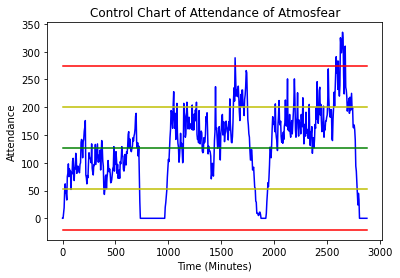

In [5]:
fig, ax = plt.subplots()

mean = np.nanmean(attendance)
std = np.nanstd(attendance)
x_axis = range(0, len(attendance)*5, 5)
ax.plot(x_axis, attendance, 'b-')
ax.plot(x_axis, [mean + 2 * std] * len(attendance), 'r-')
ax.plot(x_axis, [mean - 2 * std] * len(attendance), 'r-')
ax.plot(x_axis, [mean + std] * len(attendance), 'y-')
ax.plot(x_axis, [mean - std] * len(attendance), 'y-')
ax.plot(x_axis, [mean] * len(attendance), 'g-')
ax.set_ylabel('Attendance')
ax.set_xlabel('Time (Minutes)')
ax.set_title('Control Chart of Attendance of Atmosfear')

#print("Mean = " + str(mean) + ", Standard Deviation = " + str(std))

Text(0.5, 0, 'Time (Minutes)')

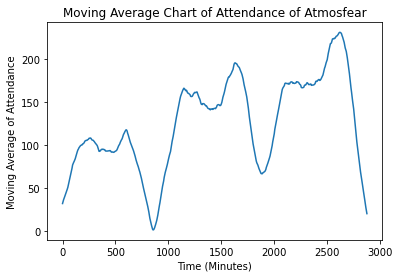

In [6]:
# Moving average chart of the attendance

fig, ax = plt.subplots()

window_size = 50
ax.plot(x_axis, np.convolve(attendance, np.ones(window_size,)/window_size, 'same'), )
ax.set_title('Moving Average Chart of Attendance of Atmosfear')
ax.set_ylabel('Moving Average of Attendance')
ax.set_xlabel('Time (Minutes)')

Text(0.5, 1.0, 'Exponentially-weighted Moving Average Chart of Attendance of Atmosfear')

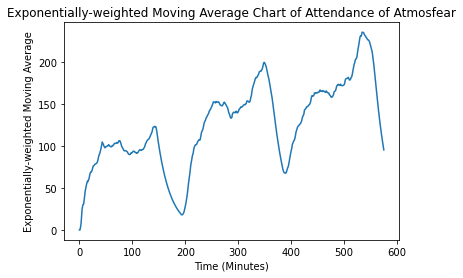

In [7]:
# Provide a 50-sample moving average window with the average computed with exponential weighting (i.e. an exponentially-weight moving average) over the same 'Atmosfear' attendance data

fig, ax = plt.subplots()

window_size = 50
attendance_datafrme = pd.DataFrame(attendance)
attendance_datafrme_exp = attendance_datafrme.ewm(span=window_size).mean()
ax.plot(attendance_datafrme_exp)
ax.set_ylabel('Exponentially-weighted Moving Average')
ax.set_xlabel('Time (Minutes)')
ax.set_title('Exponentially-weighted Moving Average Chart of Attendance of Atmosfear')